In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
forwardjunctions = pd.read_csv("forwardcounts_cow_testis.tsv", sep="\t").set_index("junction")
backwardjunctions = pd.read_csv("tmp.tsv", sep="\t").set_index("junction")

In [3]:
forwardjunctions.head()

,cow-testis-neonat1-linear,cow-testis-neonat2-linear,cow-testis-neonat3-linear,cow-testis-adult1-linear,cow-testis-adult2-linear,cow-testis-adult3-linear
junction,,,,,,
10:1000040:-:a,88.0,141.0,139.0,125.0,88.0,121.0
10:100119603:+:d,68.0,112.0,88.0,413.0,917.0,471.0
10:100125353:+:a,68.0,112.0,88.0,424.0,942.0,485.0
10:100125429:+:d,98.0,121.0,127.0,532.0,1103.0,588.0
10:100127500:+:a,98.0,109.0,127.0,119.0,183.0,146.0


In [4]:
backwardjunctions.head()

,cow-testis-neonat2-circ,cow-testis-adult1-circ,cow-testis-adult2-circ,cow-testis-neonat1-circ,cow-testis-adult3-circ,cow-testis-neonat3-circ
junction,,,,,,
10:100125352:+:a,16,14.0,16.0,11.0,26.0,15.0
10:100133931:+:a,14,6.0,14.0,36.0,0.0,19.0
10:100134061:+:d,16,14.0,16.0,11.0,26.0,15.0
10:100149043:+:d,14,6.0,14.0,36.0,0.0,19.0
10:100149043:+:d,14,6.0,14.0,36.0,0.0,8.0


In [22]:
df = forwardjunctions.join(backwardjunctions).fillna(0)
df = df[df.min(axis=1)>5]

Text(0.5, 1.0, 'neonat1 circular vs neonat2 circular')

<Figure size 576x216 with 0 Axes>

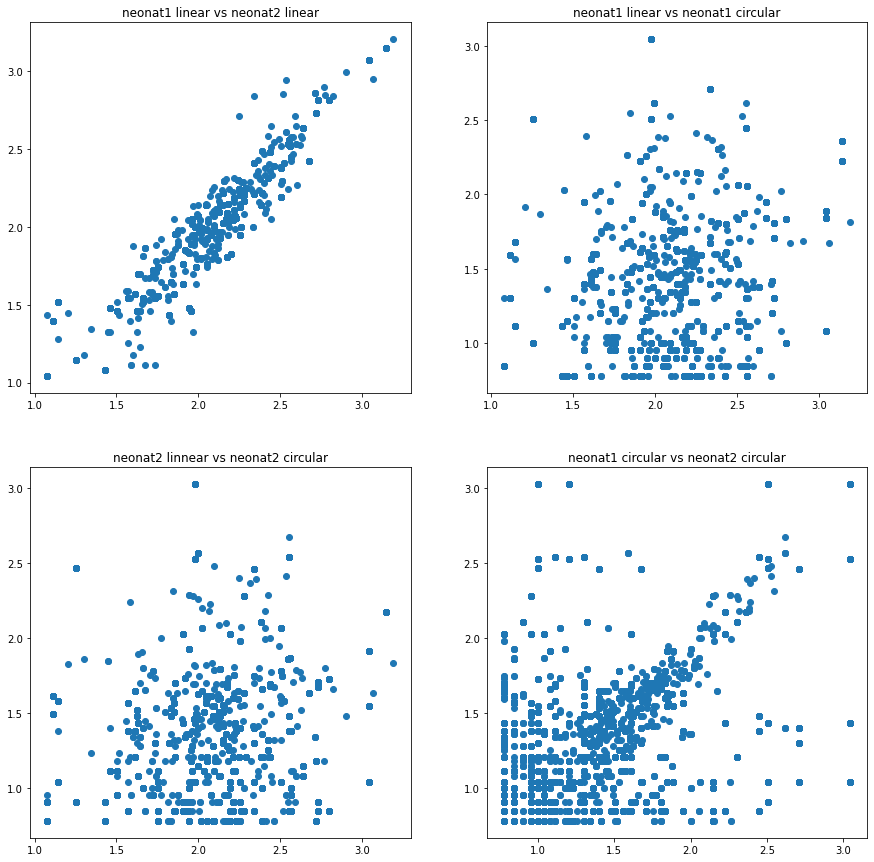

In [25]:
plt.figure(figsize=(8, 3))
fig, axs = plt.subplots(2, 2, figsize=(15,15))

# Linear vs linear
x = np.log10(df[['cow-testis-neonat1-linear']])
y = np.log10(df[['cow-testis-neonat2-linear']])
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('neonat1 linear vs neonat2 linear')
x = np.log10(df[['cow-testis-neonat1-linear']])
y = np.log10(df[['cow-testis-neonat1-circ']])
axs[0, 1].scatter(x, y)
axs[0, 1].set_title('neonat1 linear vs neonat1 circular')
x = np.log10(df[['cow-testis-neonat1-linear']])
y = np.log10(df[['cow-testis-neonat2-circ']])
axs[1, 0].scatter(x, y)
axs[1, 0].set_title('neonat2 linnear vs neonat2 circular')
x = np.log10(df[['cow-testis-neonat1-circ']])
y = np.log10(df[['cow-testis-neonat2-circ']])
axs[1, 1].scatter(x, y)
axs[1, 1].set_title('neonat1 circular vs neonat2 circular')